In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
file_path = '/kaggle/input/customer-data-clustring/Customer-Data - 2.csv'
data = pd.read_csv(file_path)

In [48]:
print(data.columns)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [49]:
missing_values = data.isna().sum()
print(missing_values)


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [50]:
data_types = data.dtypes
print(data_types)


CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [51]:
X = data.drop(columns=['CUST_ID'])

# Handle missing values by replacing them with the mean of the column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [52]:
def train_and_evaluate(model, X):
    model.fit(X)
    labels = model.predict(X)
    silhouette = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    return silhouette, calinski_harabasz, labels

In [53]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
gmm_model = GaussianMixture(n_components=3, random_state=42)

In [54]:
kmeans_silhouette, kmeans_calinski, kmeans_labels = train_and_evaluate(kmeans_model, X_scaled)
print(f"K-means Silhouette Score: {kmeans_silhouette}")
print(f"K-means Calinski-Harabasz Score: {kmeans_calinski}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Silhouette Score: 0.25052998077461597
K-means Calinski-Harabasz Score: 1604.394715679983


In [55]:
gmm_silhouette, gmm_calinski, gmm_labels = train_and_evaluate(gmm_model, X_scaled)
print(f"GMM Silhouette Score: {gmm_silhouette}")
print(f"GMM Calinski-Harabasz Score: {gmm_calinski}")

GMM Silhouette Score: 0.0997294467862327
GMM Calinski-Harabasz Score: 818.8318138114688


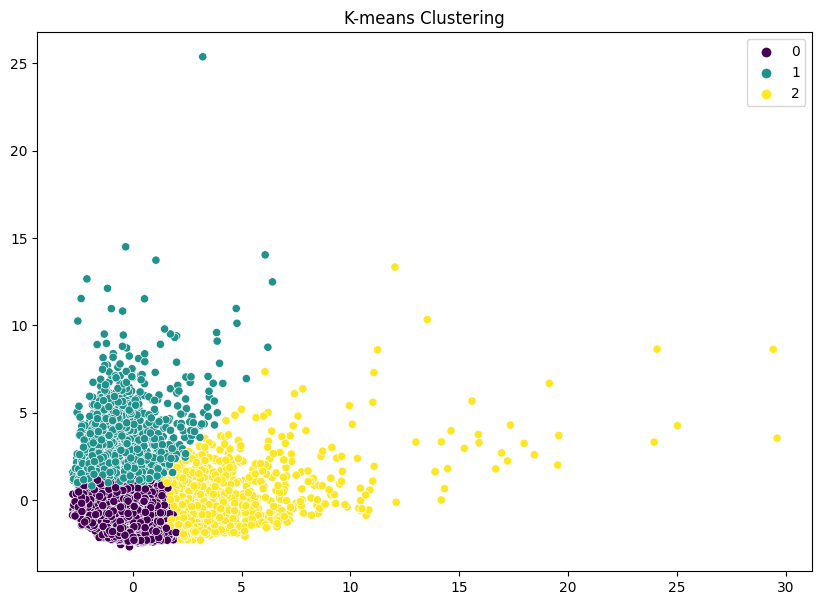

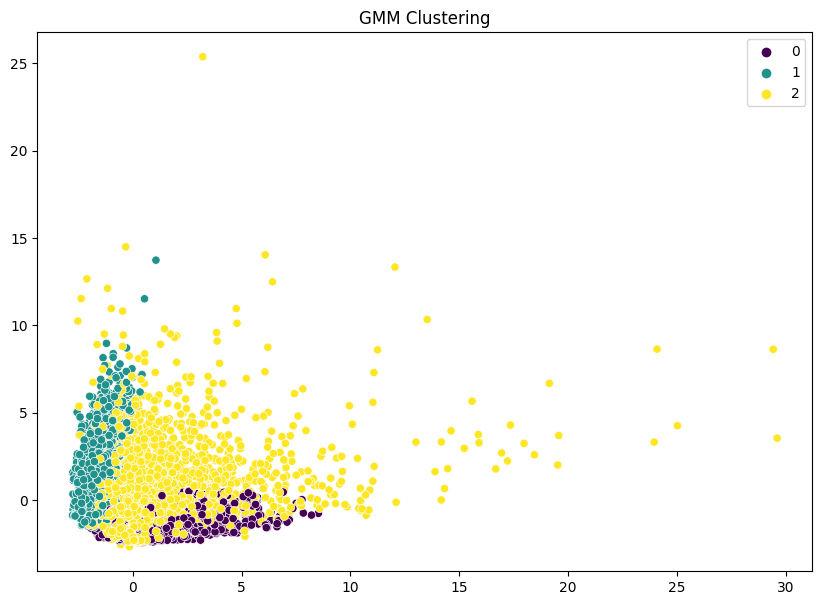

In [56]:
def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis')
    plt.title(title)
    plt.show()

# Plot K-means clusters
plot_clusters(X_scaled, kmeans_labels, 'K-means Clustering')

# Plot GMM clusters
plot_clusters(X_scaled, gmm_labels, 'GMM Clustering')